<a href="https://colab.research.google.com/github/amaansarang/Wheelotrack/blob/main/Project_YOLOv8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training the YOLO V8 Model for detecting vehicles and pedestrains

### Importing the Libraries

In [ ]:
import os
import cv2
import random
import pandas as pd
import seaborn as sns
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from deep_sort_realtime.deepsort_tracker import DeepSort

### Importing the training images and labels

In [1]:
!pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1xSBCv9Kytc2JS_VlSBkj2gl3RC-hi_-5

Retrieving folder contents
Failed to retrieve folder contents


In [ ]:
import os
print(os.listdir("Traffic_data/train/images"))  # Verify images
print(os.listdir("Traffic_data/train/labels"))  # Verify labels


In [ ]:
train_images = './Traffic_data/train/images'
train_labels = './Traffic_data/train/labels'


### Count

In [ ]:
image_files = os.listdir(train_images)
print(f"Number of images found: {len(image_files)}")

label_files = os.listdir(train_labels)
print(f"Number of label files found: {len(label_files)}")

Number of images found: 2704
Number of label files found: 2704


### Checking the images and objects that needs to be detected

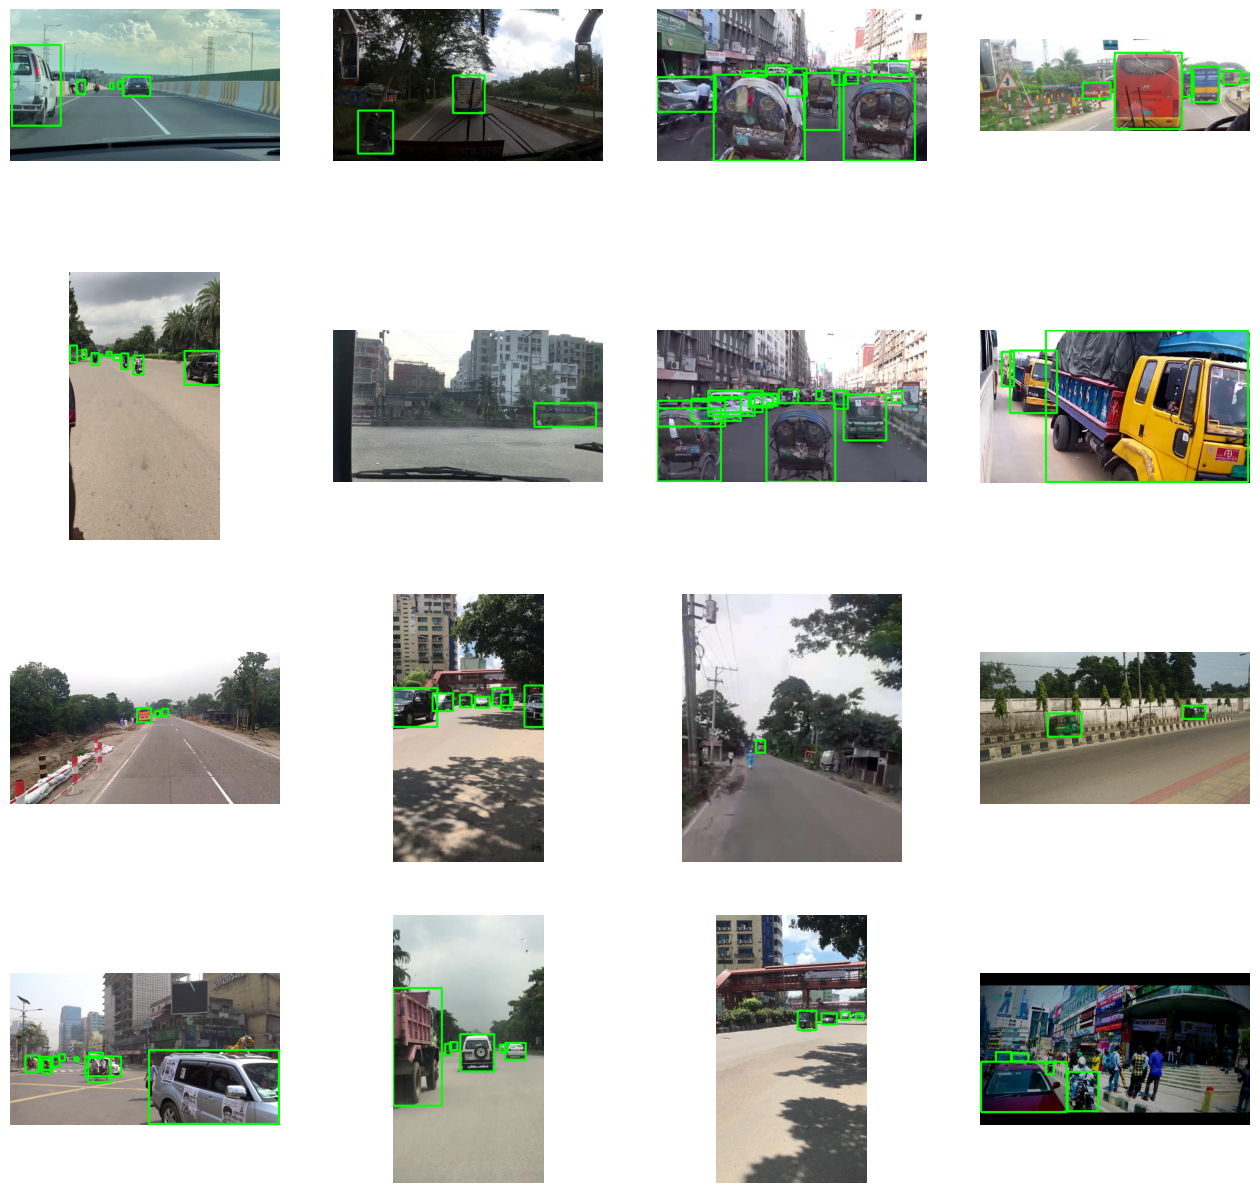

In [ ]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

image_files = os.listdir(train_images)
random_images = random.sample(image_files, 16)
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    labels = load_labels(image_file, train_labels)
    plot_object_detections(axs[row, col], image, labels)

plt.show()

### Checking number of unique objects

There are 21 different vehicles in the dataset. The model will be trained to recognize and classify objects into one of the 21 specified vehicles. The training images are stored in the 'train' directory, and the validation images are stored in the 'valid' directory. The class names represent the different objects or entities the model is trained to detect. The list includes classes such as 'ambulance', 'bicycle', 'car', 'bus', 'scooter', 'truck', etc.

In [ ]:
with open(r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\data_1.yaml', 'r') as f:
    data = f.read()
print(data)

train: C:/Users/Sri Lakshmi/Downloads/2022510053/Traffic_data/train/images
val: C:/Users/Sri Lakshmi/Downloads/2022510053/Traffic_data/valid/images

nc: 21
names: ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


### Checking shape of the image

In [ ]:
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x359 and 3 channels.


### Trying Pre-trained YOLOv8 For Detection


image 1/1 C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\train\images\Dipto_-268_jpg.rf.932e49523b43face5c6cded34b63dea8.jpg: 256x416 3 persons, 2 cars, 1 truck, 190.5ms
Speed: 9.7ms preprocess, 190.5ms inference, 21.5ms postprocess per image at shape (1, 3, 256, 416)


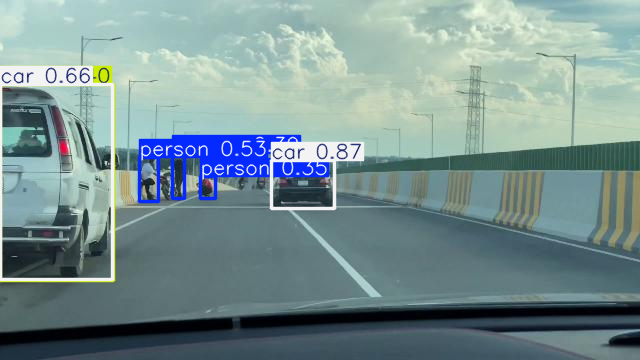

In [ ]:
model = YOLO("yolov8n.pt")
result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


0: 192x320 1 car, 1 truck, 40.7ms
Speed: 2.3ms preprocess, 40.7ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 persons, 43.5ms
Speed: 1.0ms preprocess, 43.5ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 person, 8 cars, 39.4ms
Speed: 1.0ms preprocess, 39.4ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 128x320 2 buss, 34.6ms
Speed: 0.0ms preprocess, 34.6ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 320)

0: 320x192 3 persons, 1 car, 41.3ms
Speed: 1.0ms preprocess, 41.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 192)

0: 192x320 (no detections), 34.6ms
Speed: 1.0ms preprocess, 34.6ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 10 cars, 1 truck, 1 parking meter, 42.9ms
Speed: 1.0ms preprocess, 42.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 truck, 45.2ms
Speed: 0.0ms preprocess, 45.2ms infer

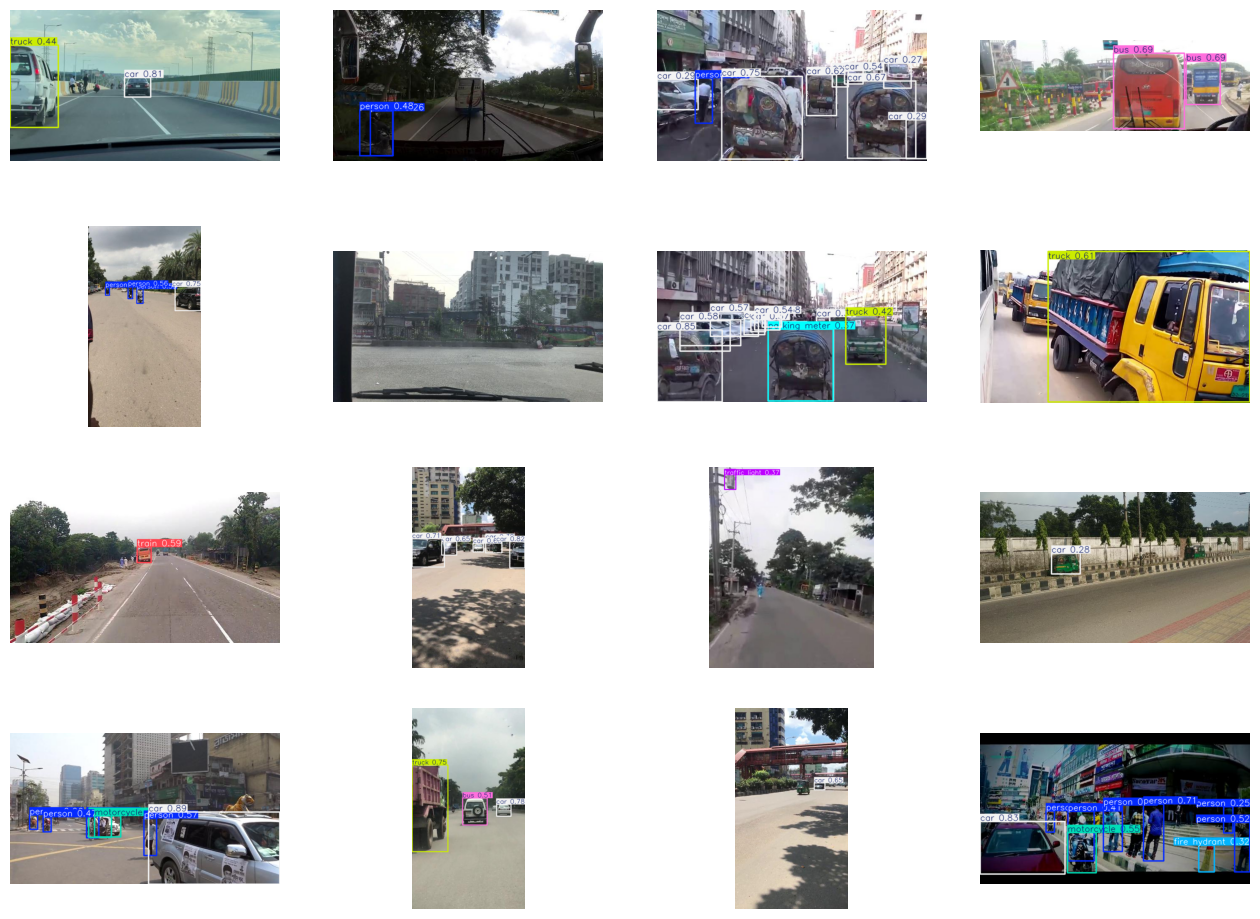

In [ ]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    result_predict = model.predict(image, imgsz=(320))
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    axs[row,col].imshow(plot)
    axs[row,col].axis('off')

plt.show()

### Training the model

In [ ]:
model = YOLO('yolov8n.pt')

# Training the model
model.train(data = r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\data_1.yaml',
            epochs = 10,
            imgsz = 320,
            seed = 42,
            batch = 4,
            workers = 2, amp = True)

Ultralytics YOLOv8.2.50  Python-3.11.8 torch-2.3.1+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\data_1.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\train\labels.cache... 2704 images, 2 backgrounds
val: Scanning C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\valid\labels.cache... 300 images, 0 backgrounds, 0

val: WARNING  C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\valid\images\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING  C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\valid\images\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.725      3.566      1.134         21        320: 100%|██████████| 676/676 [18:34<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:41

                   all        300       2568      0.485      0.118     0.0765     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.658      2.443       1.13         25        320: 100%|██████████| 676/676 [18:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40

                   all        300       2568       0.41      0.128      0.111     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.584      2.156      1.115         20        320: 100%|██████████| 676/676 [20:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:41

                   all        300       2568       0.48      0.152      0.121     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.566      2.014      1.112         27        320: 100%|██████████| 676/676 [19:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40

                   all        300       2568      0.432      0.159      0.134     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.521      1.906      1.096         19        320: 100%|██████████| 676/676 [20:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:44

                   all        300       2568      0.509       0.17      0.156      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.483      1.804      1.084         55        320: 100%|██████████| 676/676 [17:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:38

                   all        300       2568      0.538      0.175      0.165     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.454      1.733       1.07         47        320: 100%|██████████| 676/676 [16:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:42

                   all        300       2568      0.557      0.173      0.175        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.432      1.659      1.058         73        320: 100%|██████████| 676/676 [17:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40

                   all        300       2568       0.54      0.195       0.18      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.413      1.625      1.053         34        320: 100%|██████████| 676/676 [17:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:41

                   all        300       2568      0.547      0.197      0.186      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.389      1.579      1.041         25        320: 100%|██████████| 676/676 [17:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:41

                   all        300       2568      0.555      0.206      0.186      0.109



10 epochs completed in 3.183 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 6.2MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics YOLOv8.2.50  Python-3.11.8 torch-2.3.1+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:34


                   all        300       2568      0.556      0.205      0.186      0.109
               bicycle         30         32     0.0525     0.0312     0.0235    0.00884
                   bus        220        425      0.557       0.36      0.393      0.252
                   car        232        842      0.497      0.609      0.573      0.345
               minibus          2          2          1          0     0.0194     0.0175
               minivan         87        110      0.337        0.2      0.164      0.108
             motorbike        166        335      0.415      0.373      0.293     0.0985
                pickup        105        142       0.28      0.141      0.183      0.101
             policecar          1          1          1          0          0          0
              rickshaw         62        192      0.429      0.401      0.352      0.192
               scooter          1          1          1          0          0          0
                   su

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000219627EAB10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

### Loading the trained model

In [ ]:
model_1 = YOLO(r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\yolov8n.pt')

### Making Predictions on Test Images


0: 384x640 6 persons, 1 bicycle, 6 cars, 168.4ms
Speed: 2.0ms preprocess, 168.4ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 2 buss, 148.6ms
Speed: 2.1ms preprocess, 148.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 2 buss, 2 trucks, 161.0ms
Speed: 1.0ms preprocess, 161.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 1 bus, 1 truck, 165.5ms
Speed: 1.0ms preprocess, 165.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 2 trucks, 167.4ms
Speed: 2.5ms preprocess, 167.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 truck, 121.9ms
Speed: 1.3ms preprocess, 121.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 3 cars, 1 potted plant, 134.5ms
Speed: 2.0ms preprocess, 134.5ms inference, 1.0ms postprocess per image at shape 

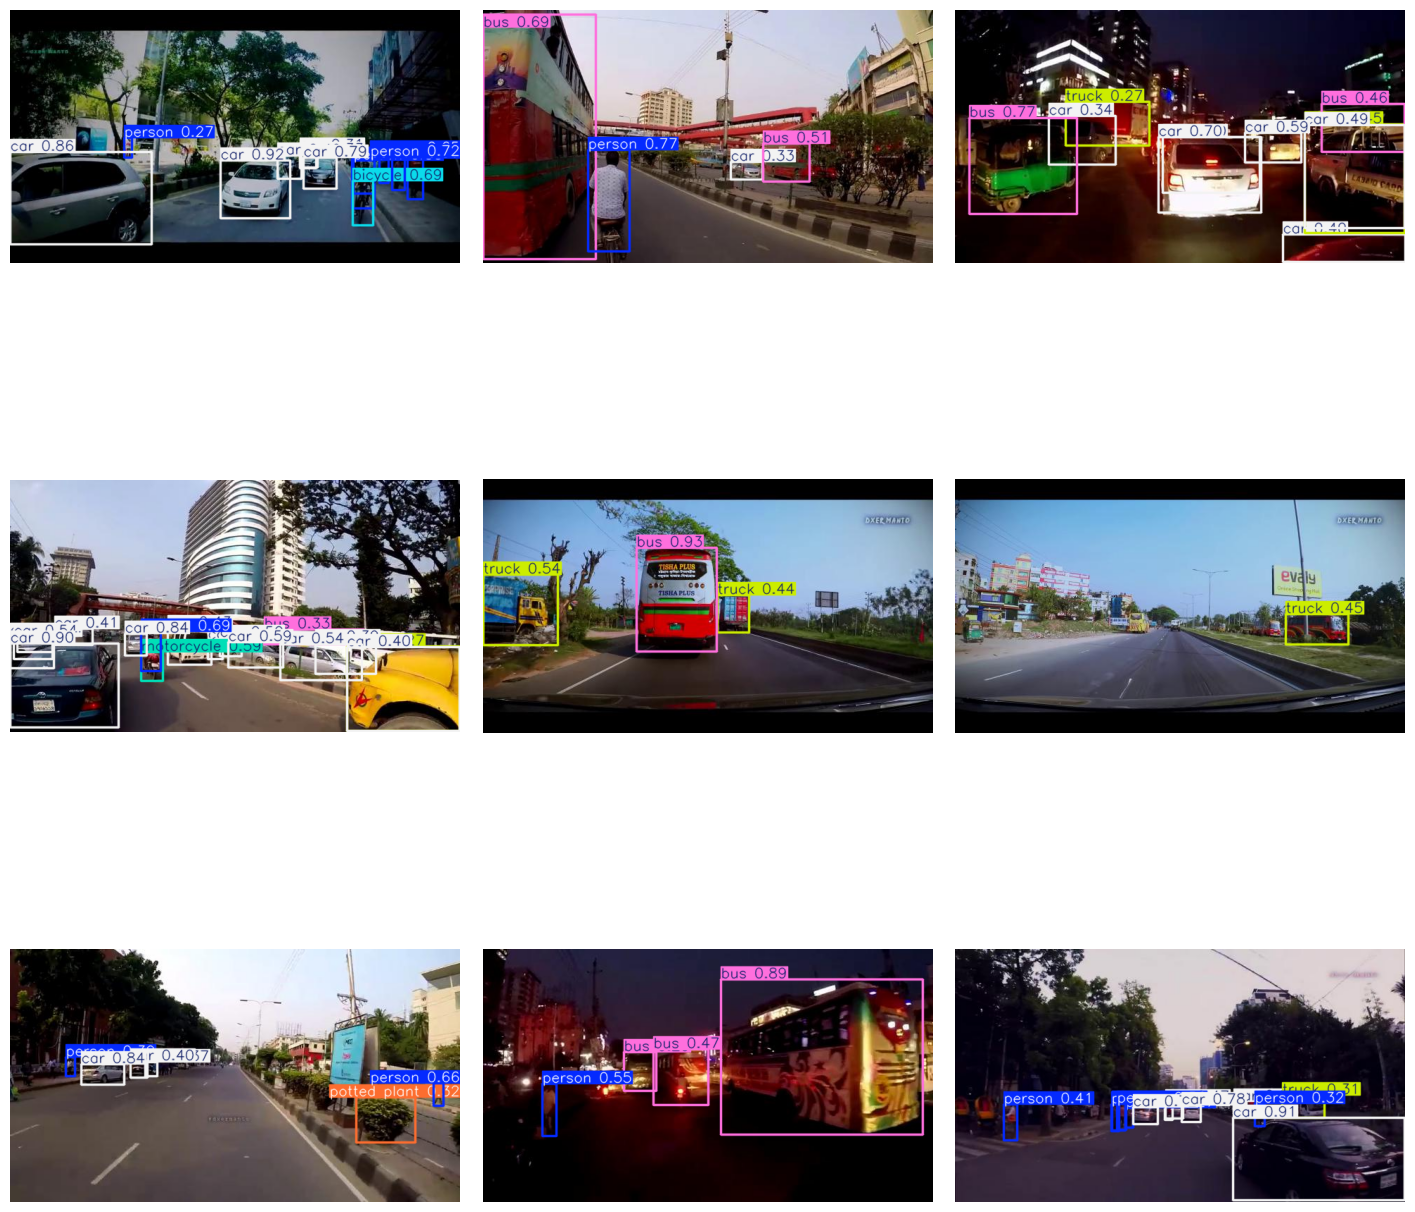

In [ ]:
def ship_detect(img_path):
    img = cv2.imread(img_path)
    detect_result = model_1(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

custom_image_dir = r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\valid\images'
image_files = os.listdir(custom_image_dir)
selected_images = random.sample(image_files, 9)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for i, img_file in enumerate(selected_images):
    row_idx = i // 3
    col_idx = i % 3
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)

### Model Performance

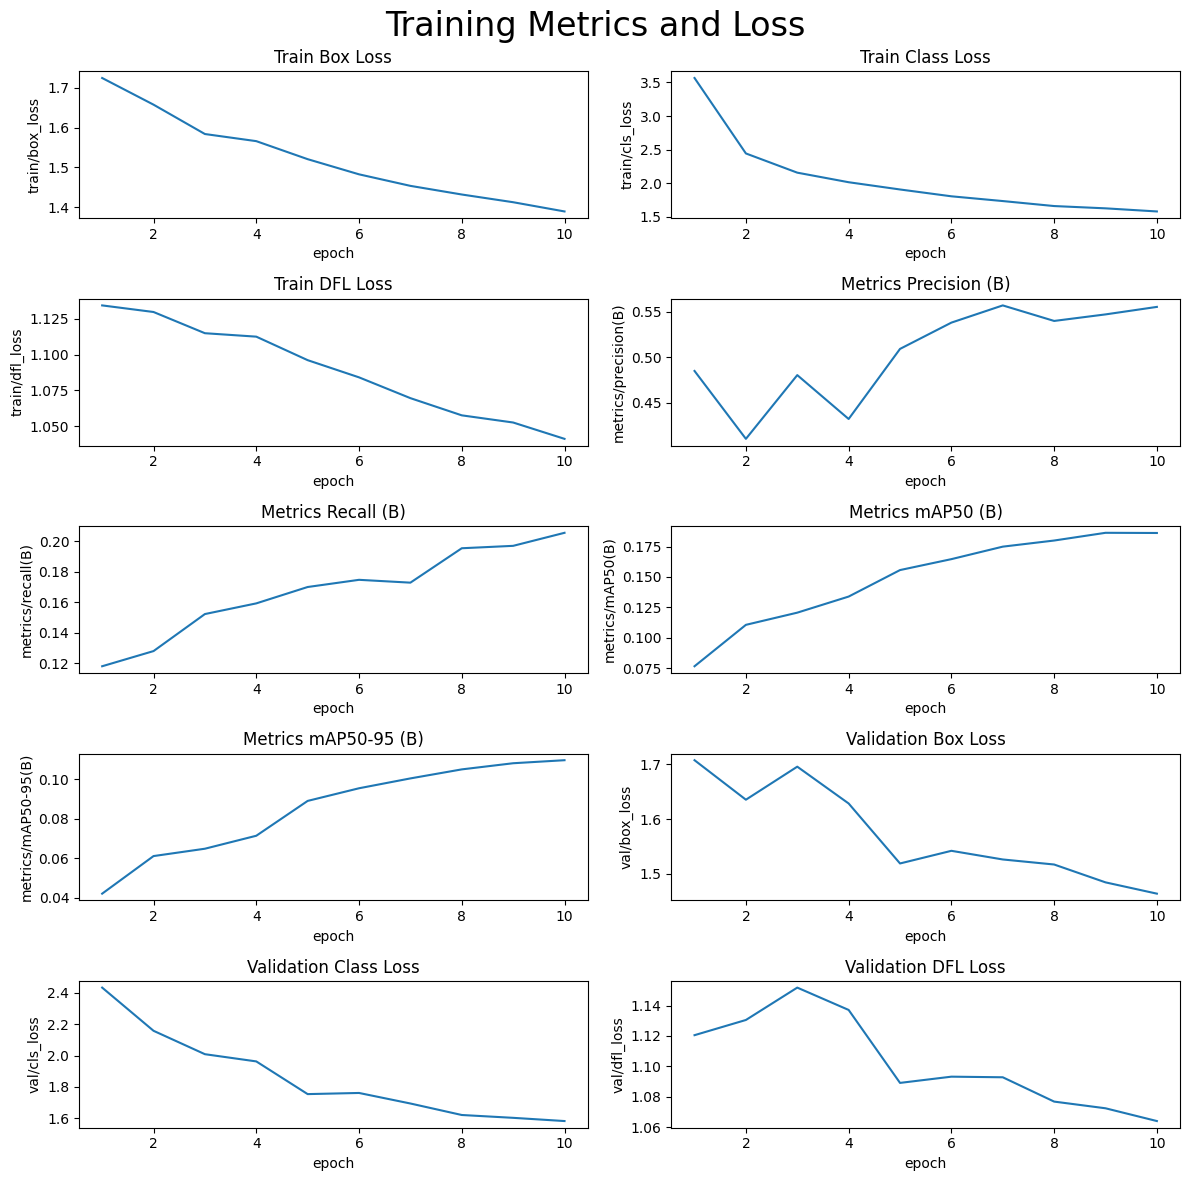

In [ ]:
df = pd.read_csv(r'C:\Users\Sri Lakshmi\Downloads\2022510053\runs\detect\train7\results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

### Normalized Confusion Matrix

(-0.5, 2999.5, 2249.5, -0.5)

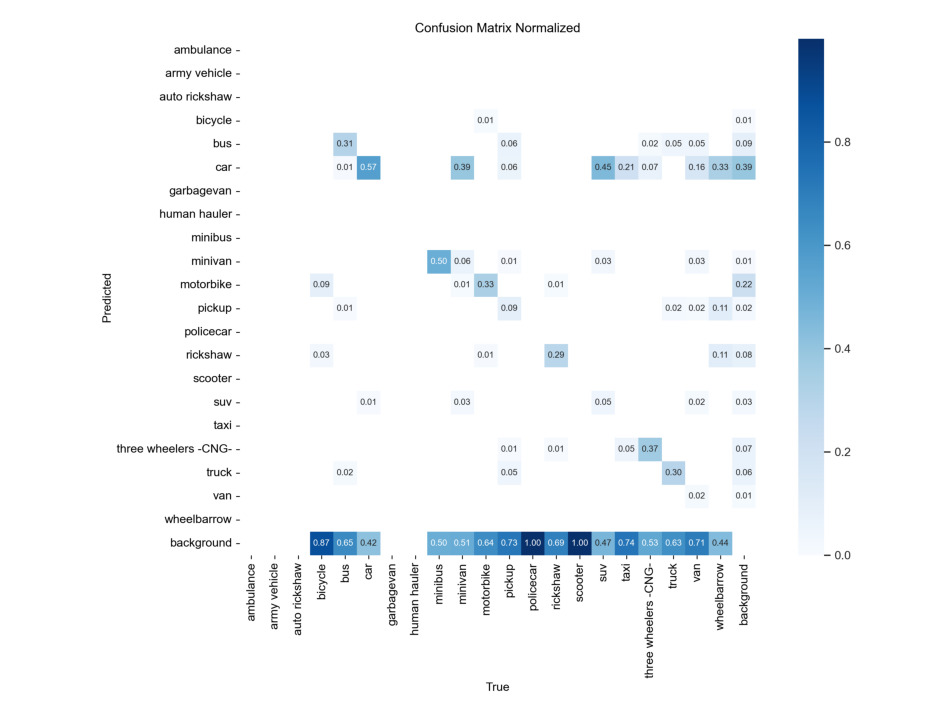

In [ ]:
img = mpimg.imread(r'C:\Users\Sri Lakshmi\Downloads\2022510053\runs\detect\train7\confusion_matrix_normalized.png')
fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(img)
ax.axis('off')

### Evaluation metrics curves

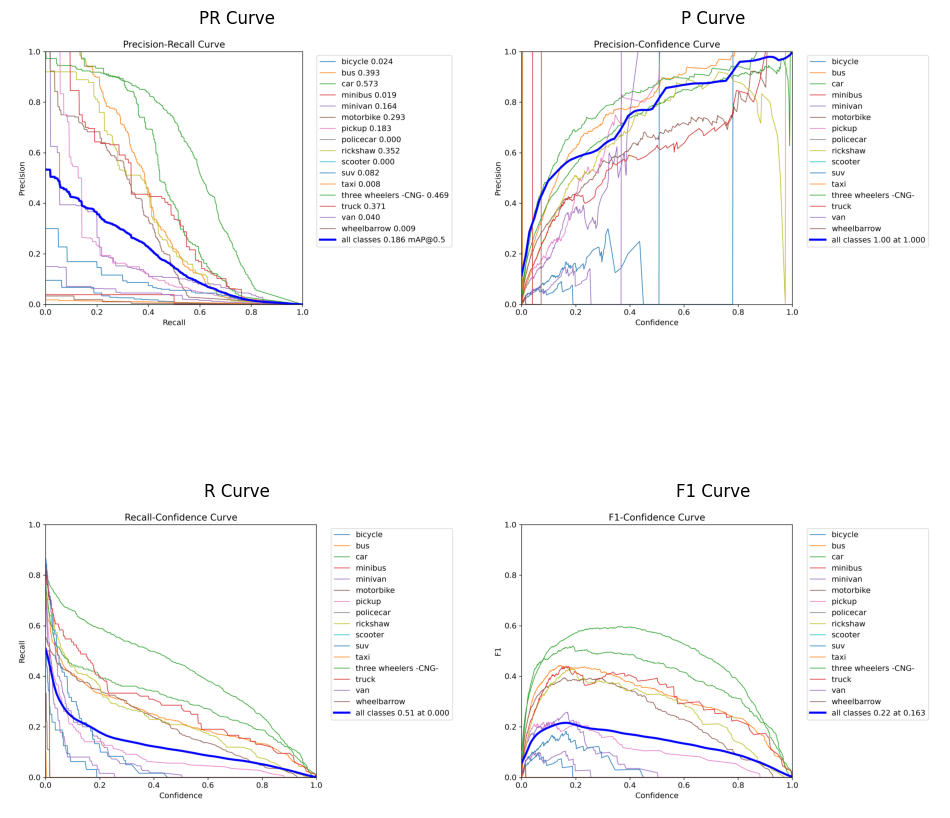

In [ ]:
pr_curve_path = r'C:\Users\Sri Lakshmi\Downloads\2022510053\runs\detect\train7\PR_curve.png'
p_curve_path = r'C:\Users\Sri Lakshmi\Downloads\2022510053\runs\detect\train7\P_curve.png'
r_curve_path = r'C:\Users\Sri Lakshmi\Downloads\2022510053\runs\detect\train7\R_curve.png'
f1_curve_path = r'C:\Users\Sri Lakshmi\Downloads\2022510053\runs\detect\train7\F1_curve.png'

pr_curve_img = mpimg.imread(pr_curve_path)
p_curve_img = mpimg.imread(p_curve_path)
r_curve_img = mpimg.imread(r_curve_path)
f1_curve_img = mpimg.imread(f1_curve_path)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(pr_curve_img)
axs[0, 0].axis('off')
axs[0, 0].set_title('PR Curve')

axs[0, 1].imshow(p_curve_img)
axs[0, 1].axis('off')
axs[0, 1].set_title('P Curve')

axs[1, 0].imshow(r_curve_img)
axs[1, 0].axis('off')
axs[1, 0].set_title('R Curve')

axs[1, 1].imshow(f1_curve_img)
axs[1, 1].axis('off')
axs[1, 1].set_title('F1 Curve')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

### Detecting and storing it as a video

In [ ]:
model_1 = YOLO(r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\yolov8n.pt')

def detect_objects_in_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    # Getting video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Defining the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model_1(frame, imgsz=320)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)
        cv2.imshow('Frame', annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    out.release()
    cv2.destroyAllWindows()

video_path = r"C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\vdo.mp4"
output_path = r"C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\vdo_output.mp4"
detect_objects_in_video(video_path, output_path)


0: 192x320 2 persons, 2 bicycles, 1 car, 1 bus, 170.7ms
Speed: 6.8ms preprocess, 170.7ms inference, 17.6ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 3 persons, 3 bicycles, 1 car, 1 bus, 111.1ms
Speed: 3.8ms preprocess, 111.1ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 3 persons, 3 bicycles, 1 car, 1 bus, 68.3ms
Speed: 1.0ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 4 persons, 3 bicycles, 1 car, 1 bus, 1 truck, 68.0ms
Speed: 1.0ms preprocess, 68.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 persons, 4 bicycles, 1 car, 1 bus, 67.7ms
Speed: 1.0ms preprocess, 67.7ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 persons, 4 bicycles, 2 cars, 1 bus, 1 truck, 69.4ms
Speed: 2.0ms preprocess, 69.4ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 2 persons, 3 bicycles, 1 car, 1 bus, 65.9ms
Sp

### Webcam Detection

In [ ]:
# Loading the YOLOv8 model
model_1 = YOLO(r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\yolov8n.pt')

# Function to perform real-time detection using the webcam
def real_time_detection():
    # Opening the webcam
    cap = cv2.VideoCapture(0)
    # Checking if the webcam is opened correctly
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return
    while True:
        # Reading a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Running the frame through the YOLOv8 model
        results = model_1(frame, imgsz=320)
        # Getting the annotated frame
        annotated_frame = results[0].plot()
        # Displaying the annotated frame
        cv2.imshow('Webcam YOLOv8 Detection', annotated_frame)
        # Breaking the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Releasing the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

# Starting real-time detection
real_time_detection()


0: 256x320 1 person, 216.4ms
Speed: 9.8ms preprocess, 216.4ms inference, 18.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 91.1ms
Speed: 2.0ms preprocess, 91.1ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 99.1ms
Speed: 1.0ms preprocess, 99.1ms inference, 5.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 113.7ms
Speed: 3.0ms preprocess, 113.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 110.2ms
Speed: 1.6ms preprocess, 110.2ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 1 couch, 107.7ms
Speed: 3.0ms preprocess, 107.7ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 111.2ms
Speed: 2.0ms preprocess, 111.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 97.3ms
Speed: 1.0ms preprocess, 97.3ms inference, 2.6ms postprocess per imag

### IP Webcam Setup

In [ ]:
# Loading the YOLOv8 model
model_1 = YOLO(r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\yolov8n.pt')

# Function to perform real-time detection using IP Webcam feed
def ip_webcam_detection(ip_webcam_url):
    # Open the IP Webcam feed
    cap = cv2.VideoCapture(ip_webcam_url)
    # Checking if the feed is opened correctly
    if not cap.isOpened():
        print("Error: Could not open IP Webcam feed.")
        return
    while True:
        # Reading a frame from the IP Webcam feed
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Running the frame through the YOLOv8 model
        results = model_1(frame, imgsz=320)
        # Getting the annotated frame
        annotated_frame = results[0].plot()
        # Displaying the annotated frame
        cv2.imshow('IP Webcam YOLOv8 Detection', annotated_frame)
        # Breaking the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Releasing the IP Webcam feed and close windows
    cap.release()
    cv2.destroyAllWindows()

# IP Webcam URL
ip_webcam_url = 'http://192.168.1.6:8080/video'
# Starting real-time detection
ip_webcam_detection(ip_webcam_url)


0: 192x320 (no detections), 88.2ms
Speed: 3.0ms preprocess, 88.2ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 36.0ms
Speed: 1.5ms preprocess, 36.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 29.1ms
Speed: 1.0ms preprocess, 29.1ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 person, 27.7ms
Speed: 1.5ms preprocess, 27.7ms inference, 1.5ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 28.5ms
Speed: 0.0ms preprocess, 28.5ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 fire hydrant, 30.7ms
Speed: 1.0ms preprocess, 30.7ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 person, 30.5ms
Speed: 0.0ms preprocess, 30.5ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 chair, 31.5ms
Speed: 1.0ms preprocess, 31.5ms inference, 0.0ms postpro

### Multi-Camera Setup

In [ ]:
# Loading the YOLOv8 model
model_1 = YOLO(r'C:\Users\Sri Lakshmi\Downloads\2022510053\Traffic_data\yolov8n.pt')

# Function to perform real-time detection using multiple IP Webcam feeds
def multi_camera_detection(ip_webcam_urls):
    caps = [cv2.VideoCapture(url) for url in ip_webcam_urls]
    # Checking if all feeds are opened correctly
    for i, cap in enumerate(caps):
        if not cap.isOpened():
            print(f"Error: Could not open IP Webcam feed {i+1}.")
            return
    while True:
        frames = []
        for cap in caps:
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame from one of the feeds.")
                break
            frames.append(frame)
        if len(frames) != len(caps):
            break

        # Processing each frame and display results
        for i, frame in enumerate(frames):
            results = model_1(frame, imgsz=320)
            annotated_frame = results[0].plot()
            cv2.imshow(f'IP Webcam YOLOv8 Detection {i+1}', annotated_frame)

        # Breaking the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Releasing all IP Webcam feeds and close windows
    for cap in caps:
        cap.release()
    cv2.destroyAllWindows()

# List of IP Webcam URLs
ip_webcam_urls = ['http://192.168.1.4:8080/video', 'http://192.168.1.10:8080/video']

# Starting real-time detection with multiple cameras
multi_camera_detection(ip_webcam_urls)


0: 192x320 (no detections), 106.2ms
Speed: 0.0ms preprocess, 106.2ms inference, 3.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 41.0ms
Speed: 1.0ms preprocess, 41.0ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 39.6ms
Speed: 1.0ms preprocess, 39.6ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 30.0ms
Speed: 0.9ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 27.6ms
Speed: 0.0ms preprocess, 27.6ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 26.0ms
Speed: 1.0ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 26.6ms
Speed: 1.0ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 27.0ms
Speed: 1.0ms preprocess, 27.0ms